In [1]:
#from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#import os
#import shutil
#import h5py
from scipy import io
from scipy import signal
#import glob
import csv
from biosppy.signals import ecg
from sklearn.preprocessing import LabelEncoder

In [2]:
arr = []

with open('training2017/REFERENCE.csv', newline='') as csvfile:
    
     spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        
     for row in spamreader:
        
         spam = row[0].split(',')
            
         if spam[1] == 'A': # af ecg
            
            arr.append(spam[0])
            
print (len(arr))            

738


4049.6229116945105 2771.8264996569665 419 4400.855648535565 2643.2552837480976 2390


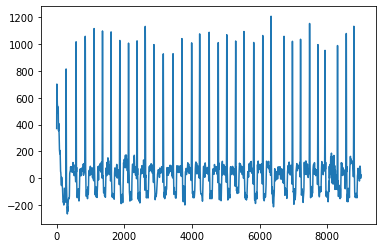

In [3]:
db = io.loadmat('training2017/' + arr[65]) 
dummy = db['val'][0, :]
min = np.amin(dummy)
max = np.amax(dummy)
L = np.where(dummy >= 0.4*max)
LL = np.where(dummy <= 0.3*min)
plt.plot(dummy)
print (np.mean(L), np.sqrt(np.var(L)), len(L[0]), np.mean(LL), np.sqrt(np.var(LL)), len(LL[0]))

In [4]:
db1 = io.loadmat('training2017/' + arr[0]) 
dummy1 = db1['val'][0, :]
out1 = ecg.ecg(signal=dummy1, sampling_rate=300, show=False)

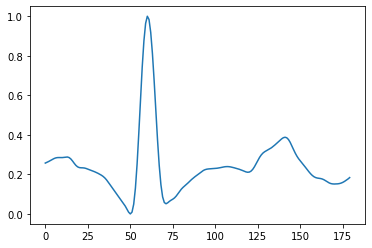

In [5]:
temp1 = out1['templates'][0].reshape(-1, 1) 
mintemp1 = np.amin(temp1)
maxtemp1 = np.amax(temp1)
temp1 = (temp1-mintemp1)/(maxtemp1-mintemp1)
plt.plot(temp1)

In [6]:
db2 = io.loadmat('training2017/' + arr[303]) 
dummy2 = db2['val'][0, :]
out2 = ecg.ecg(signal=dummy2, sampling_rate=300, show=False)

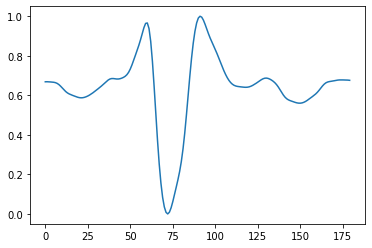

In [7]:
temp2 = out2['templates'][0].reshape(-1, 1) 
mintemp2 = np.amin(temp2)
maxtemp2 = np.amax(temp2)
temp2 = (temp2-mintemp2)/(maxtemp2-mintemp2)
plt.plot(temp2)

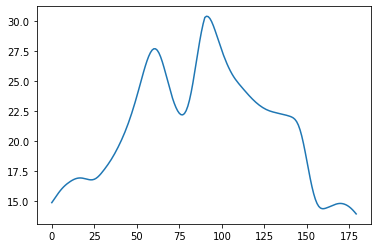

In [8]:
go = signal.correlate(temp1[:,0], temp2[:,0], 'same')
plt.plot(go)

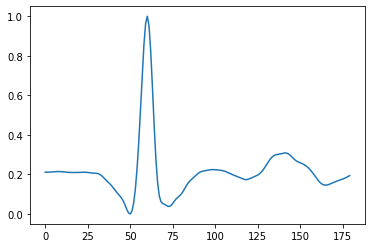

In [9]:
temp11 = out1['templates'][1].reshape(-1, 1) 
mintemp11 = np.amin(temp11)
maxtemp11 = np.amax(temp11)
temp11 = (temp11-mintemp11)/(maxtemp11-mintemp11)
plt.plot(temp11)

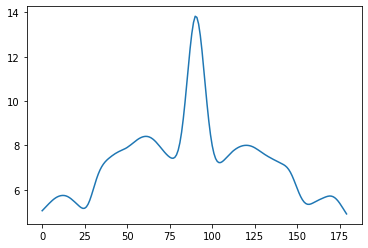

In [10]:
go = signal.correlate(temp1[:,0], temp11[:,0], 'same')
plt.plot(go)

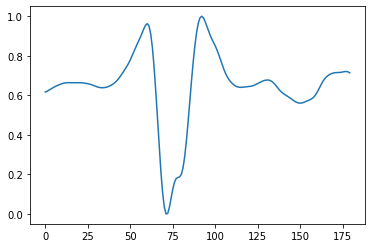

In [11]:
temp22 = out2['templates'][1].reshape(-1, 1) 
mintemp22 = np.amin(temp22)
maxtemp22 = np.amax(temp22)
temp22 = (temp22-mintemp22)/(maxtemp22-mintemp22)
plt.plot(temp22)

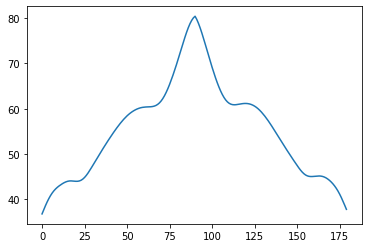

In [12]:
go = signal.correlate(temp2[:,0], temp22[:,0], 'same')
plt.plot(go)

In [16]:
np.mean(out1['heart_rate'])

65.55096554346402

In [17]:
np.var(out1['heart_rate'])

55.89741004707375